In [5]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('../processed_data/merged_data_2013-2022.csv')
df = df.drop(columns=["Unnamed: 0"])

In [2]:
# simple OLS regression model
# note: this fit does not account for the whole strength of the relationship

# "only aqi vs asthma rate"
#model = smf.ols("asthma_rate ~ median_aqi", data=df).fit()
#print(model.summary())

In [6]:
# multiple OLS regression model
# note: more complex model but gave much more stronger relationship between aqi and asthma rate

# "aqi vs asthma rate by county and year"
mod = smf.ols('asthma_rate ~ median_aqi + C(county) + C(year)', data=df).fit()
y = df['asthma_rate']
y_pred  = mod.fittedvalues
residuals = mod.resid

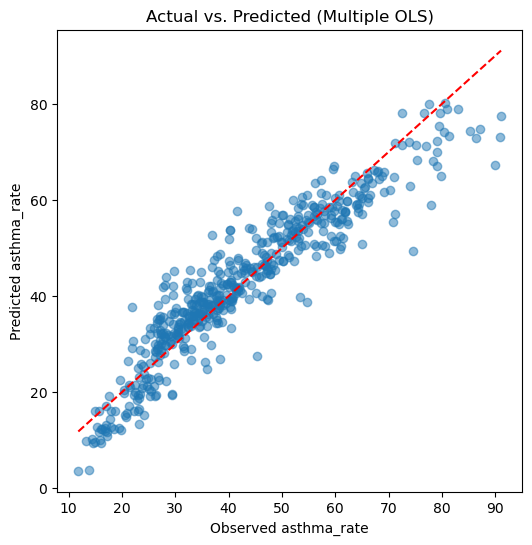

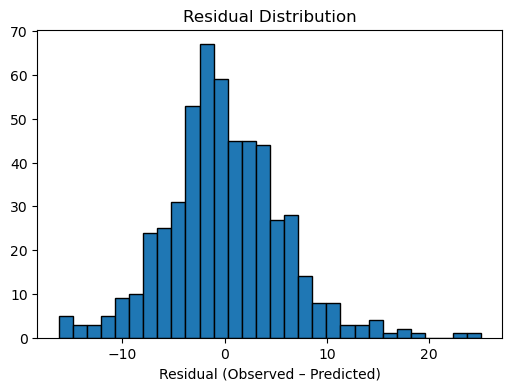

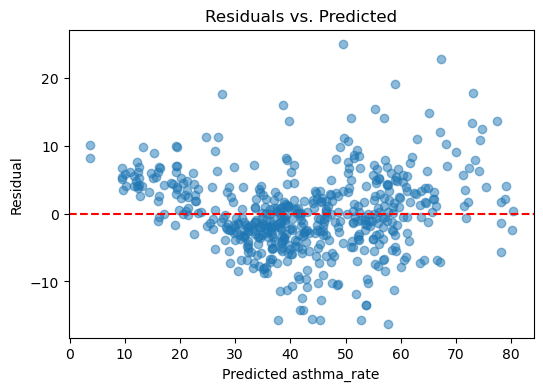

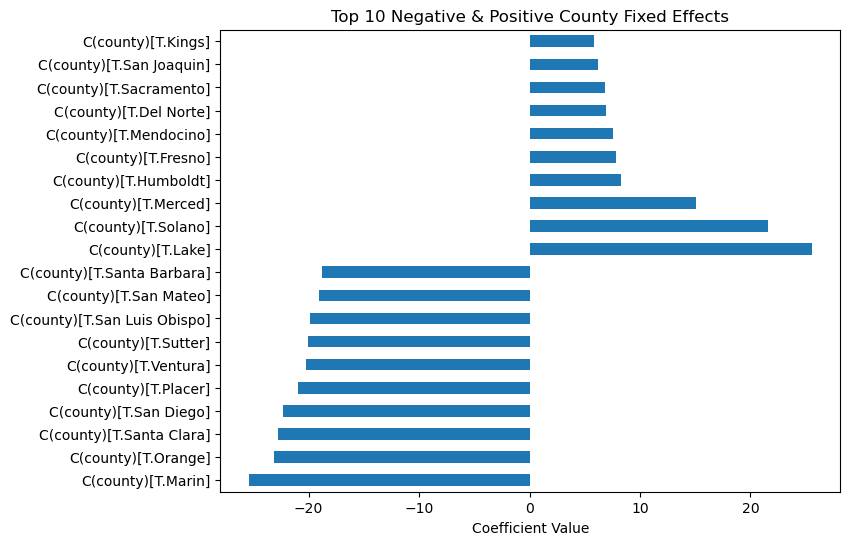

In [18]:
# actual vs. predicted
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Observed asthma_rate')
plt.ylabel('Predicted asthma_rate')
plt.title('Actual vs. Predicted (Multiple OLS)')
plt.show()

# residual distribution
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual (Observed – Predicted)')
plt.title('Residual Distribution')
plt.show()

# Residuals vs. Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Predicted asthma_rate')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted')
plt.show()

# Top County Effects
coefs = mod.params.filter(like='C(county)')
# Select top 10 positive and top 10 negative
top_pos = coefs.sort_values(ascending=False).head(10)
top_neg = coefs.sort_values().head(10)
plot_coefs = pd.concat([top_neg, top_pos])

plt.figure(figsize=(8,6))
plot_coefs.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Negative & Positive County Fixed Effects')
plt.show()